# **Task 2: Data Cleaning & Modeling**

---

*(1) `Data requirements specifications`*

*(2) `Data collections`*

*(3) `Data preparations`*

*(4) `Data exploratory`*

*(5) `Modeling & Evaluation`*

*(6) `Communication of insights`*

## **1. Data requirements specifications**

An analysis of their content categories that highlights the top 5 categories with the largest aggregate popularity.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

## **2. Data collections**

We have 7 datasets and a data model:

- `User`
- `Profile`
- `Location`
- `Session`
- `Content`
- `Reaction`
- `ReactionTypes`

After using the data model to determine which datasets will be required to answer your business question - i.e. finding the top 5 categories with the greatest popularity, we select 3 matching datasets: `Content`, `Reaction` and `ReactionTypes`

In [2]:
content = pd.read_csv(r'C:\Users\user\OneDrive\Máy tính\Personal Project\accenture\Task 2 - Data Cleaning & Modeling\Content.csv')
reaction = pd.read_csv(r'C:\Users\user\OneDrive\Máy tính\Personal Project\accenture\Task 2 - Data Cleaning & Modeling\Reactions.csv')
reactionTypes = pd.read_csv(r'C:\Users\user\OneDrive\Máy tính\Personal Project\accenture\Task 2 - Data Cleaning & Modeling\ReactionTypes.csv')

## **3. Data preparations**

## **- content dataset**

### - Understanding the big picture

In [3]:
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [4]:
content.drop(['Unnamed: 0','URL'],axis=1,inplace=True)

In [5]:
content.shape

(1000, 4)

In [6]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   User ID     1000 non-null   object
 2   Type        1000 non-null   object
 3   Category    1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [7]:
content.describe(include='all')

,Content ID,User ID,Type,Category
count,1000,1000,1000,1000
unique,1000,446,4,41
top,97522e57-d9ab-4bd6-97bf-c24d952602d2,72d2587e-8fae-4626-a73d-352e6465ba0f,photo,technology
freq,1,8,261,71


### - Preparation (Clean Data)

In [8]:
content.isna().sum()

Content ID    0
User ID       0
Type          0
Category      0
dtype: int64

In [9]:
content.duplicated().sum()

0

In [10]:
content['Type'].value_counts()

Type
photo    261
video    259
GIF      244
audio    236
Name: count, dtype: int64

In [11]:
content['Category'].value_counts()

Category
technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: c

In [12]:
# Correct the values so that the values are consistent
content['Category'] = content['Category'].str.lower()

In [13]:
content['Category'].value_counts()

Category
technology           72
animals              71
travel               69
science              67
fitness              66
culture              64
food                 63
healthy eating       62
soccer               61
cooking              60
education            59
tennis               58
studying             57
dogs                 56
veganism             49
public speaking      49
"culture"             3
"soccer"              3
"dogs"                2
"studying"            1
"animals"             1
"tennis"              1
"food"                1
"technology"          1
"cooking"             1
"public speaking"     1
"veganism"            1
"science"             1
Name: count, dtype: int64

In [14]:
# Removing " character in Category column
content['Category'] = content['Category'].str.strip('"')

In [15]:
content.rename(columns={'Type':'Content Types'},inplace=True)

In [16]:
content.drop('User ID',axis=1,inplace=True)

In [17]:
content.head()

,Content ID,Content Types,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


## **- reaction dataset**

### - Understanding the big picture

In [18]:
reaction.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [19]:
reaction.drop('Unnamed: 0',axis=1,inplace=True)

In [20]:
reaction.shape

(25553, 4)

In [21]:
reaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  25553 non-null  object
 1   User ID     22534 non-null  object
 2   Type        24573 non-null  object
 3   Datetime    25553 non-null  object
dtypes: object(4)
memory usage: 798.7+ KB


In [22]:
reaction.describe(include='all')

,Content ID,User ID,Type,Datetime
count,25553,22534,24573,25553
unique,980,500,16,25542
top,4b2d0fff-3b4f-43ca-a7df-c430479cb9ba,c76c3393-88e2-47b0-ac37-dc4f2053f5a5,heart,2020-10-29 20:51:08
freq,49,65,1622,2


### - Preparation (Clean Data)

In [23]:
reaction.isna().sum()

Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [24]:
reaction = reaction.dropna(subset=['Type']).reset_index(drop=True)

In [25]:
reaction.duplicated().sum()

0

In [26]:
# Changing data type of Datetime column
reaction['Datetime'] = pd.to_datetime(reaction['Datetime'], format='ISO8601')

In [27]:
reaction['Type'].value_counts()

Type
heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: count, dtype: int64

In [28]:
reaction = reaction.sort_values(by='Datetime',ascending=True).reset_index(drop=True)

In [29]:
reaction = reaction.drop('User ID',axis=1)

In [30]:
reaction.rename(columns={'Type':'Reaction Type'},inplace=True)

In [31]:
reaction.head()

,Content ID,Reaction Type,Datetime
0,a727ed7f-5684-4536-b543-8e8fc93f40b1,hate,2020-06-18 08:07:22
1,70b0202f-cd58-42fe-acd9-7b2f8cf9e7c6,scared,2020-06-18 08:22:47
2,edea43f3-1541-4e42-8419-d1cdf749025c,intrigued,2020-06-18 08:51:33
3,a8160135-2d55-4240-8f28-fbee5ec84801,scared,2020-06-18 09:13:59
4,6e418568-a2b9-4d08-b241-06362c96a7f1,adore,2020-06-18 10:37:41


## **- reactionTypes dataset**

### - Understanding the big picture

In [32]:
reactionTypes.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [33]:
reactionTypes.drop('Unnamed: 0',axis=1,inplace=True)

In [34]:
reactionTypes.shape

(16, 3)

In [35]:
reactionTypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 516.0+ bytes


In [36]:
reactionTypes.describe(include='all')

,Type,Sentiment,Score
count,16,16,16.000000
unique,16,3,NaN
top,heart,positive,NaN
freq,1,9,NaN
mean,NaN,NaN,39.625000
std,NaN,NaN,26.901983
min,NaN,NaN,0.000000
25%,NaN,NaN,14.250000
50%,NaN,NaN,40.000000
75%,NaN,NaN,66.250000


### - Preparation (Clean Data)

In [37]:
reactionTypes['Type'].unique()

array(['heart', 'want', 'disgust', 'hate', 'interested', 'indifferent',
       'love', 'super love', 'cherish', 'adore', 'like', 'dislike',
       'intrigued', 'peeking', 'scared', 'worried'], dtype=object)

In [38]:
reactionTypes['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [39]:
reactionTypes['Score'].unique()

array([60, 70,  0,  5, 30, 20, 65, 75, 72, 50, 10, 45, 35, 15, 12],
      dtype=int64)

In [40]:
reactionTypes.rename(columns={'Type':'Reaction Type'},inplace=True)

In [41]:
reactionTypes.head()

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


## **4. Data exploratory**

In [42]:
# Merging 3 cleaned datasets
df = pd.merge(reaction,content,on='Content ID')
df = pd.merge(df,reactionTypes,on='Reaction Type')

In [43]:
df.head()

,Content ID,Reaction Type,Datetime,Content Types,Category,Sentiment,Score
0,a727ed7f-5684-4536-b543-8e8fc93f40b1,hate,2020-06-18 08:07:22,video,cooking,negative,5
1,a727ed7f-5684-4536-b543-8e8fc93f40b1,hate,2020-09-11 09:07:52,video,cooking,negative,5
2,a727ed7f-5684-4536-b543-8e8fc93f40b1,hate,2021-05-01 01:39:58,video,cooking,negative,5
3,70b0202f-cd58-42fe-acd9-7b2f8cf9e7c6,hate,2020-12-15 04:03:17,video,cooking,negative,5
4,edea43f3-1541-4e42-8419-d1cdf749025c,hate,2020-11-04 18:04:05,photo,cooking,negative,5


In [44]:
#df.to_csv('cleaned_data.csv',index=False)

In [45]:
agreegate_score = df.groupby('Category')['Score'].sum().reset_index()
agreegate_score

,Category,Score
0,animals,74965
1,cooking,64756
2,culture,66579
3,dogs,52511
4,education,57436
5,fitness,55323
6,food,66676
7,healthy eating,69339
8,public speaking,49264
9,science,71168


Text(0.5, 1.02, 'Categories Agreegate Score')

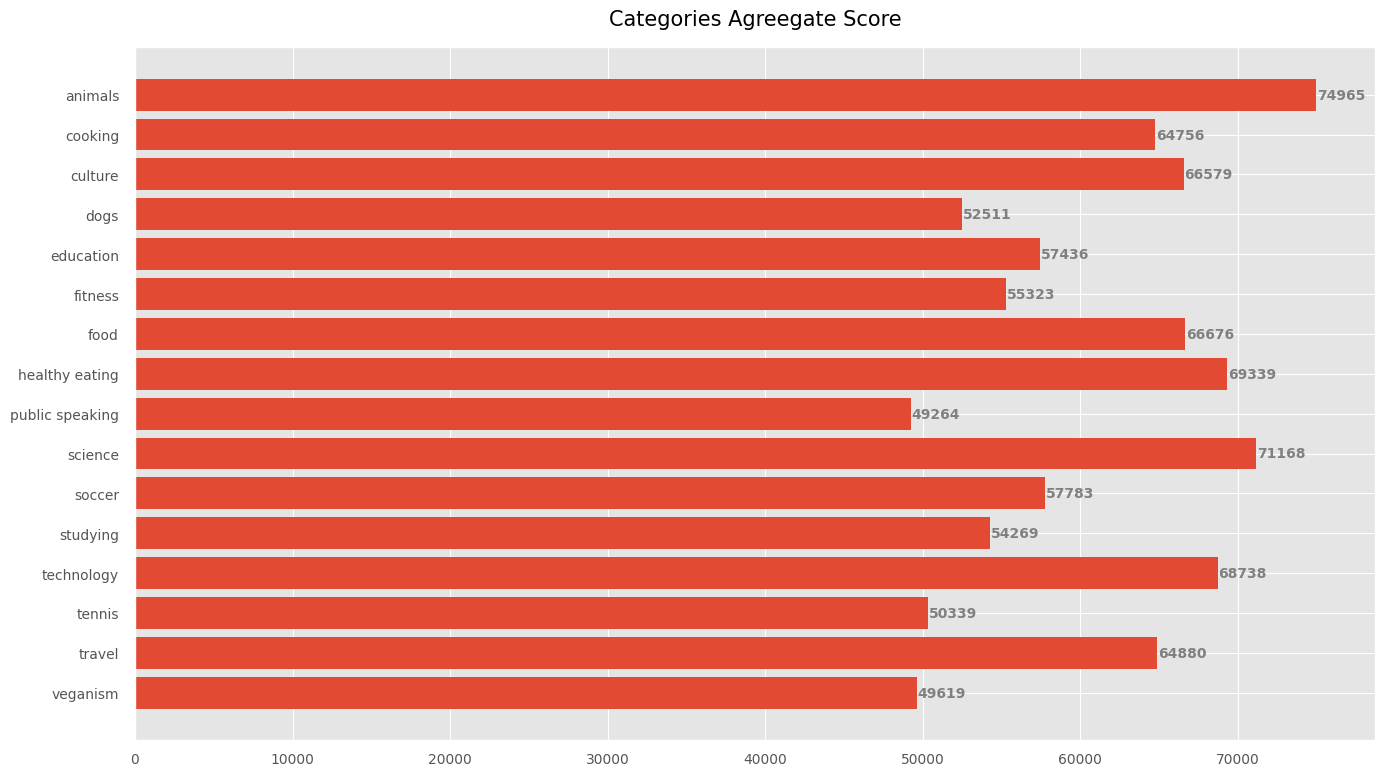

In [71]:
# Figure Size
fig, ax = plt.subplots(figsize=(16,9))

# Horizontal Bar Plot
ax.barh(agreegate_score['Category'],agreegate_score['Score'])

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=8)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+50, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')

# Add Plot Title
ax.set_title('Categories Agreegate Score',fontsize=15,y=1.02)

In [46]:
top5_categories = agreegate_score.sort_values(by='Score',ascending=False)[:5].reset_index(drop=True)
top5_categories

,Category,Score
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676


In [79]:
# How many reactions are there to the most popular category?
reaction_by_categories = df.groupby('Category')['Datetime'].count().reset_index()
reaction_by_categories.rename(columns={'Datetime':'Number of reactions'},inplace=True)
reaction_by_categories = reaction_by_categories.sort_values(by='Number of reactions',ascending=False).reset_index(drop=True)
reaction_by_categories

,Category,Number of reactions
0,animals,1897
1,science,1796
2,healthy eating,1717
3,food,1699
4,technology,1698
5,culture,1676
6,cooking,1664
7,travel,1647
8,soccer,1457
9,education,1433


Text(0.5, 1.02, 'Number of reactions by categories')

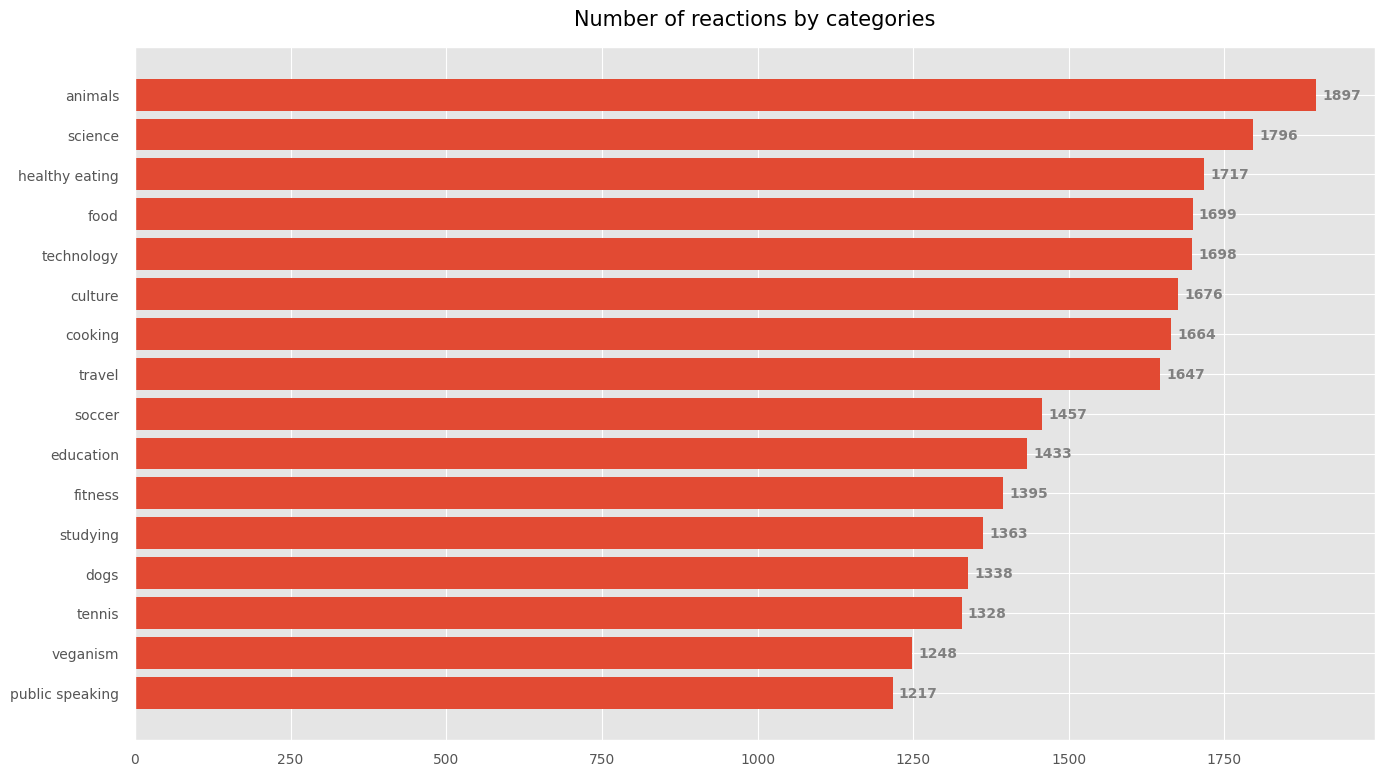

In [82]:
# Figure Size
fig, ax = plt.subplots(figsize=(16,9))

# Horizontal Bar Plot
ax.barh(reaction_by_categories['Category'],reaction_by_categories['Number of reactions'])

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=8)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+10, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')

# Add Plot Title
ax.set_title('Number of reactions by categories',fontsize=15,y=1.02)

In [85]:
df.columns

Index(['Content ID', 'Reaction Type', 'Datetime', 'Content Types', 'Category',
       'Sentiment', 'Score'],
      dtype='object')

In [91]:
# Number of each Sentiment of each content type
sentiment_by_content_type_numb = df.groupby(['Content Types','Sentiment'])['Sentiment'].count().unstack(level=1)
sentiment_by_content_type_pct = (sentiment_by_content_type_numb.div(sentiment_by_content_type_numb.sum(axis=1),axis=0)*100)
sentiment_by_content_type_pct.columns = ['negative(%)','neutral(%)','positive(%)']
sentiment_by_content_type = pd.merge(sentiment_by_content_type_numb,sentiment_by_content_type_pct,on='Content Types')
sentiment_by_content_type

,negative,neutral,positive,negative(%),neutral(%),positive(%)
Content Types,,,,,,
GIF,1924,774,3381,31.649942,12.732357,55.617700
audio,1771,673,3216,31.289753,11.890459,56.819788
photo,2057,832,3700,31.218698,12.627106,56.154196
video,1943,792,3510,31.112890,12.682146,56.204964


Text(51.49456597222222, 0.5, 'Number of sentiments')

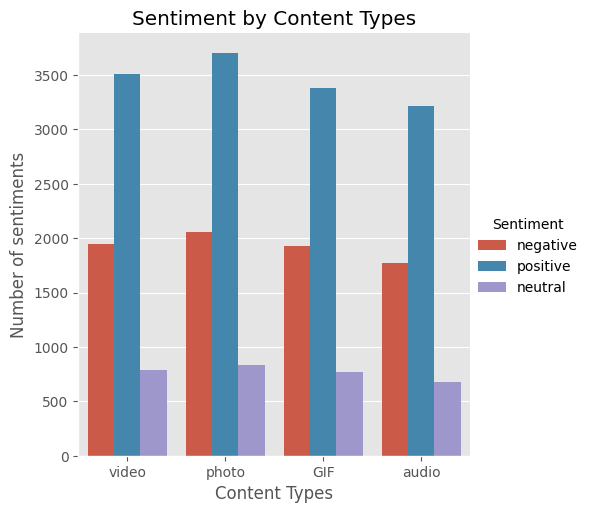

In [95]:
sns.catplot(data=df, x='Content Types', hue='Sentiment',kind='count')
plt.title('Sentiment by Content Types')
plt.ylabel('Number of sentiments')